In [ ]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import average_precision_score

In [3]:
classes = pd.read_csv('../data/elliptic_txs_classes.csv')
features = pd.read_csv('../data/elliptic_txs_features.csv', header=None)
cluster = pd.read_csv('../data/hdbscan_clustered_edges_labeled_min_70.csv').drop('Unnamed: 0', axis=1)
data = features.merge(classes, left_on=0, right_on='txId', how='left')
data = data.loc[data['class'] != 'unknown']

train = data.drop([1, 'txId', 0], axis=1)
train['class'] = (train['class'].astype(int)-2)*(-1)

In [12]:
s = setup(train, target='class', use_gpu=True)
add_metric('ap', 'Average Precision Score', average_precision_score, greater_is_better = True)

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,5502
1,Target,class
2,Target type,Binary
3,Original data shape,"(46564, 166)"
4,Transformed data shape,"(46564, 166)"
5,Transformed train set shape,"(32594, 166)"
6,Transformed test set shape,"(13970, 166)"
7,Numeric features,165
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


Name                                           Average Precision Score
Display Name                                   Average Precision Score
Score Function       <function average_precision_score at 0x7f318bd...
Scorer                            make_scorer(average_precision_score)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: ap, dtype: object

In [13]:
best = compare_models(n_select = 3, sort = 'ap')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average Precision Score,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9911,0.9969,0.9173,0.9910,0.9525,0.9476,0.9486,0.9170,0.9340
lightgbm,Light Gradient Boosting Machine,0.9909,0.9972,0.9157,0.9909,0.9516,0.9467,0.9477,0.9156,3.7220
catboost,CatBoost Classifier,0.9903,0.9970,0.9126,0.9872,0.9483,0.9429,0.9439,0.9094,33.6900
rf,Random Forest Classifier,0.9871,0.9945,0.8730,0.9946,0.9297,0.9227,0.9251,0.8807,2.7610
gbc,Gradient Boosting Classifier,0.9854,0.9933,0.8607,0.9885,0.9201,0.9121,0.9148,0.8644,65.9500
et,Extra Trees Classifier,0.9853,0.9904,0.8541,0.9942,0.9187,0.9107,0.9139,0.8634,1.6990
ada,Ada Boost Classifier,0.9794,0.9893,0.8541,0.9288,0.8898,0.8785,0.8795,0.8078,12.9230
dt,Decision Tree Classifier,0.9759,0.9376,0.8900,0.8669,0.8780,0.8646,0.8649,0.7822,2.6490
knn,K Neighbors Classifier,0.9728,0.9570,0.8262,0.8890,0.8557,0.8408,0.8419,0.7511,6.3140
lr,Logistic Regression,0.9640,0.9692,0.7620,0.8534,0.8049,0.7851,0.7867,0.6734,3.8150


In [14]:
tuned_1 = tune_model(best[0], n_iter = 10, optimize = 'ap', choose_better = True)
tuned_2 = tune_model(best[1], n_iter = 10, optimize = 'ap', choose_better = True)
tuned_3 = tune_model(best[2], n_iter = 10, optimize = 'ap', choose_better = True)

stacker = stack_models([tuned_1, tuned_2, tuned_3])

save_model(tuned_1, 'xgb')
save_model(tuned_2, 'lgb')
save_model(tuned_3, 'cat')
save_model(stacker, 'stacker')

save_experiment('config')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average Precision Score
Fold,,,,,,,,
0,0.9902,0.9982,0.9214,0.9767,0.9482,0.9428,0.9433,0.9076
1,0.9905,0.9949,0.9245,0.9767,0.9499,0.9447,0.9451,0.9104
2,0.9911,0.9987,0.9497,0.9587,0.9542,0.9493,0.9493,0.9154
3,0.9926,0.9974,0.9467,0.9773,0.9618,0.9577,0.9579,0.9305
4,0.9942,0.9987,0.9717,0.9687,0.9702,0.9669,0.9669,0.9440
5,0.9905,0.9965,0.9497,0.9527,0.9512,0.9459,0.9459,0.9097
6,0.9893,0.9939,0.9088,0.9797,0.9429,0.9370,0.9378,0.8992
7,0.9936,0.9994,0.9686,0.9655,0.9670,0.9635,0.9635,0.9382
8,0.9886,0.9968,0.9245,0.9577,0.9408,0.9345,0.9347,0.8927


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average Precision Score
Fold,,,,,,,,
0,0.9877,0.9981,0.8931,0.9793,0.9342,0.9275,0.9287,0.8850
1,0.9896,0.9950,0.8962,0.9965,0.9437,0.9380,0.9396,0.9032
2,0.9917,0.9978,0.9277,0.9866,0.9562,0.9517,0.9522,0.9223
3,0.9923,0.9977,0.9279,0.9933,0.9595,0.9553,0.9559,0.9287
4,0.9939,0.9985,0.9528,0.9838,0.9681,0.9647,0.9648,0.9420
5,0.9939,0.9966,0.9528,0.9838,0.9681,0.9647,0.9648,0.9420
6,0.9893,0.9955,0.8962,0.9930,0.9421,0.9362,0.9377,0.9001
7,0.9932,0.9993,0.9497,0.9805,0.9649,0.9611,0.9613,0.9361
8,0.9896,0.9969,0.8994,0.9931,0.9439,0.9382,0.9396,0.9029


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average Precision Score
Fold,,,,,,,,
0,0.9776,0.9865,0.7799,0.9880,0.8717,0.8596,0.8668,0.7920
1,0.9804,0.9843,0.8019,0.9961,0.8885,0.8779,0.8841,0.8181
2,0.9813,0.9854,0.8176,0.9886,0.8950,0.8848,0.8896,0.8261
3,0.9798,0.9823,0.7994,0.9922,0.8854,0.8745,0.8806,0.8128
4,0.9837,0.9892,0.8365,0.9963,0.9094,0.9005,0.9047,0.8493
5,0.9822,0.9888,0.8270,0.9887,0.9007,0.8910,0.8953,0.8346
6,0.9761,0.9800,0.7579,0.9959,0.8607,0.8479,0.8574,0.7784
7,0.9797,0.9905,0.8113,0.9773,0.8866,0.8756,0.8802,0.8113
8,0.9788,0.9860,0.7925,0.9882,0.8796,0.8681,0.8745,0.8034


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average Precision Score
Fold,,,,,,,,
0,0.9905,0.9960,0.9151,0.9864,0.9494,0.9442,0.9450,0.9110
1,0.9908,0.9937,0.9088,0.9966,0.9507,0.9456,0.9468,0.9146
2,0.9911,0.9984,0.9277,0.9801,0.9532,0.9482,0.9487,0.9162
3,0.9929,0.9961,0.9342,0.9933,0.9628,0.9589,0.9595,0.9344
4,0.9948,0.9957,0.9654,0.9808,0.9731,0.9702,0.9702,0.9503
5,0.9939,0.9948,0.9560,0.9806,0.9682,0.9648,0.9649,0.9418
6,0.9902,0.9904,0.9057,0.9931,0.9474,0.9420,0.9432,0.9086
7,0.9939,0.9989,0.9623,0.9745,0.9684,0.9650,0.9650,0.9414
8,0.9905,0.9929,0.9182,0.9832,0.9496,0.9443,0.9450,0.9108


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

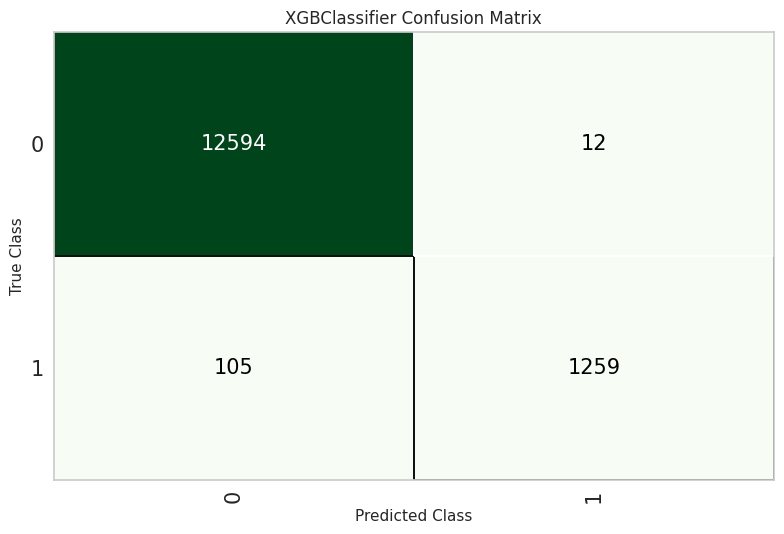

In [19]:
plot_model(tuned_1, plot = 'confusion_matrix', use_train_data=False, plot_kwargs = {'percent' : False})

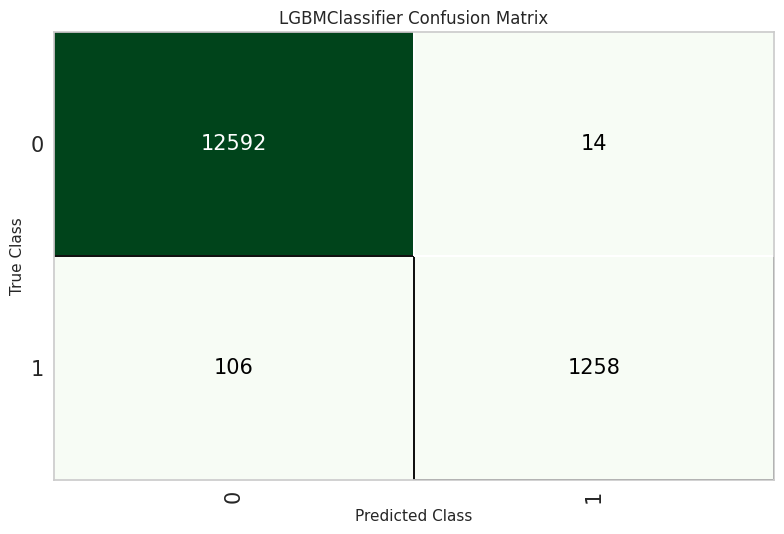

In [20]:
plot_model(tuned_2, plot = 'confusion_matrix', use_train_data=False, plot_kwargs = {'percent' : False})

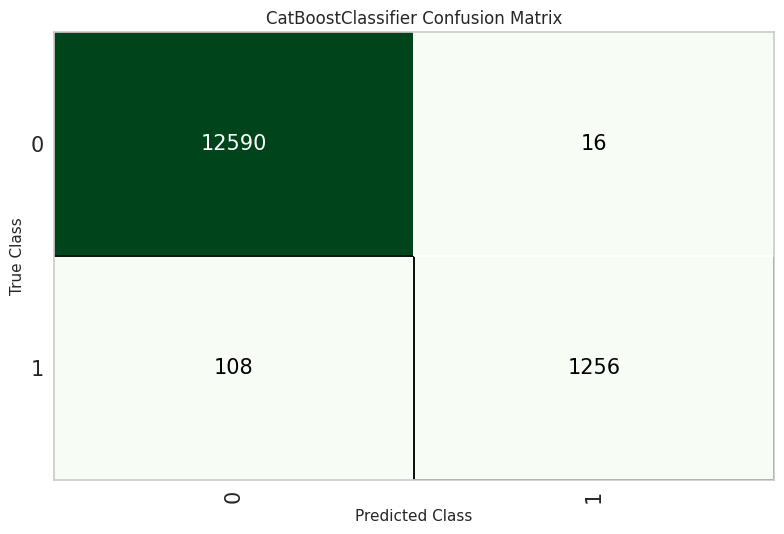

In [21]:
plot_model(tuned_3, plot = 'confusion_matrix', use_train_data=False, plot_kwargs = {'percent' : False})

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

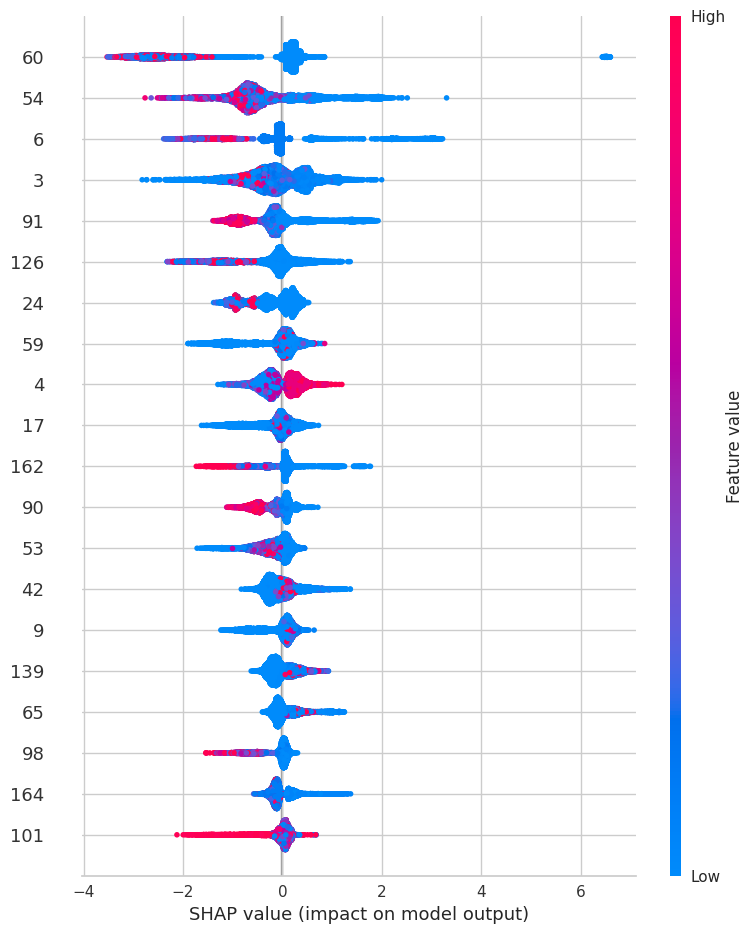

In [18]:
interpret_model(tuned_1)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

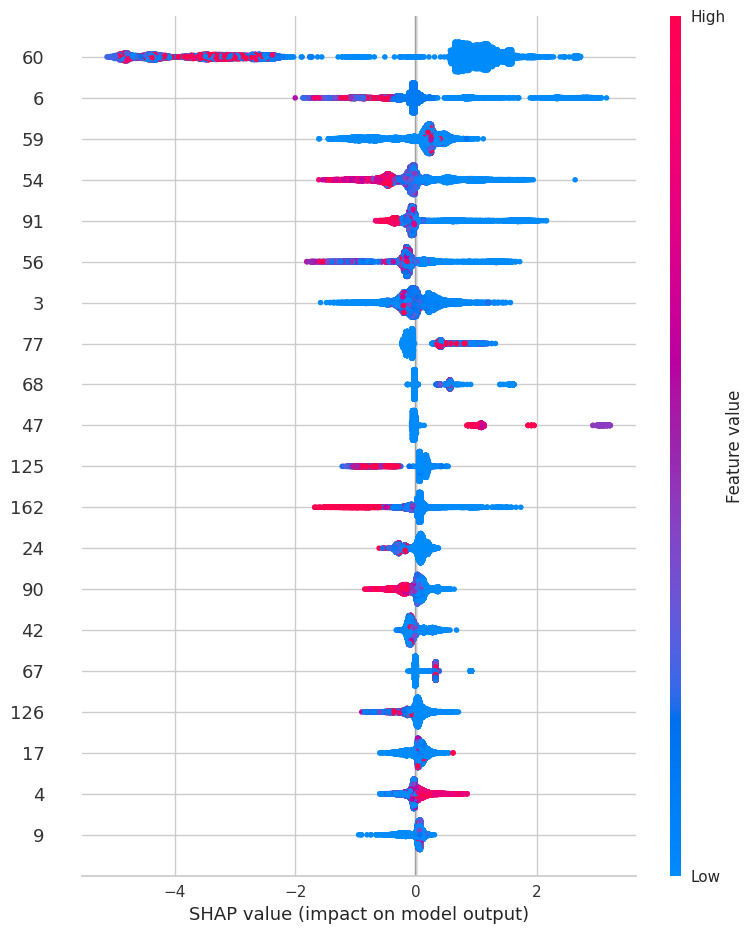

In [22]:
interpret_model(tuned_2)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

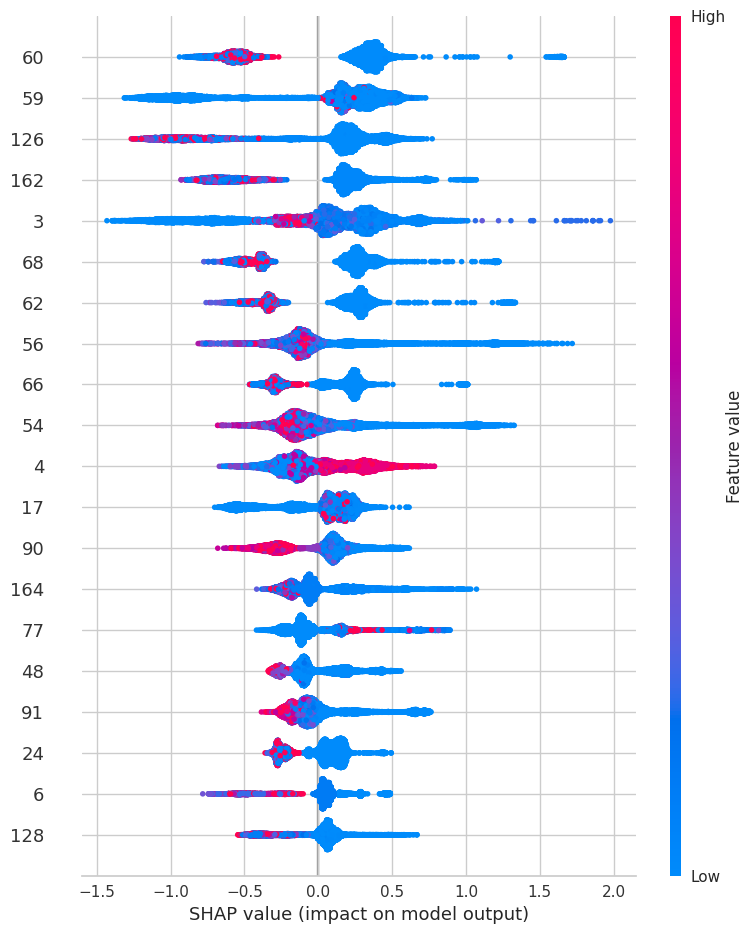

In [23]:
interpret_model(tuned_3)